# Making figures in Python

## Matplotlib

To create basic data visualizations in Python, we can use the `matplotlib` library, specifically a set of functions in a module called `pyplot`. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Plotting from a data frame
Before we can plot, we need to read in our data, the `gapminder.csv` data set.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/DeisData/python/master/data/gapminder.csv") # read in data
print(df.head())

       country  year region  population  life_expectancy  age5_surviving  \
0  Afghanistan  1800   Asia   3280000.0            28.21          53.142   
1  Afghanistan  1810   Asia   3280000.0            28.11          53.002   
2  Afghanistan  1820   Asia   3323519.0            28.01          52.862   
3  Afghanistan  1830   Asia   3448982.0            27.90          52.719   
4  Afghanistan  1840   Asia   3625022.0            27.80          52.576   

   babies_per_woman  gdp_per_capita  gdp_per_day  
0               7.0           603.0     1.650924  
1               7.0           604.0     1.653662  
2               7.0           604.0     1.653662  
3               7.0           625.0     1.711157  
4               7.0           647.0     1.771389  


First, let's make a histogram showing the overall distribution of life expectancy. 

To do this, we initialize a blank figure and set of axes with `plt.subplots()`. 

We then directly add the histogram to the axes with `ax.hist()`, being sure to specify the life expectancy column. 

Finally, we can display the figure with `plt.show()`.

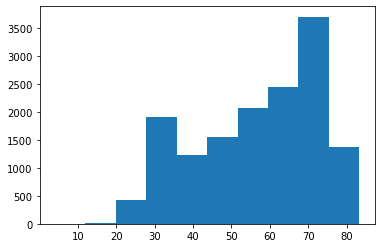

In [3]:
figure, ax = plt.subplots() # create blank figure and axes
ax.hist(df['life_expectancy']) # add histogram to axes with 30 bins
plt.show() # display figure

We also have many customization options. For the histogram itself, we can specify the number of bins, the color of the bins, and color of the bin edges within `hist()`.

We can also specify axis labels with `ax.set_xlabel()` and `ax.set_ylabel()`. The plot title is set with `ax.set_title()`.



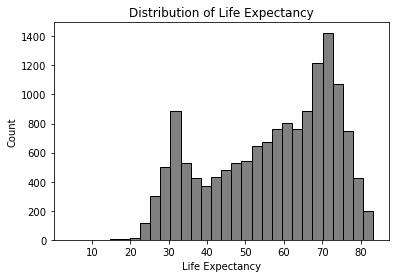

In [4]:
figure, ax = plt.subplots()
ax.hist(df['life_expectancy'],bins=30, color="grey", edgecolor='black') # specify bins, color, and edge color
ax.set_xlabel('Life Expectancy') # x axis label
ax.set_ylabel('Count') # y axis label
ax.set_title('Distribution of Life Expectancy') # add title
plt.show()

There are many more axis and plot customizations you can do. Be sure check out [the `matplotlib` documentation](https://matplotlib.org/).

### Line Plot

Line plots are another simple visualization we can make through `matplotlib`.

Let's a plot of life expectancy in Jamaica over time. First, we need to subset the data frame to only include data from Jamaica.

Then, we make a plot just as we did before, but instead of using `ax.hist()`, we use `ax.plot(x, y)`, putting the year first to specify the x axis, followed by life expectancy for the y. 

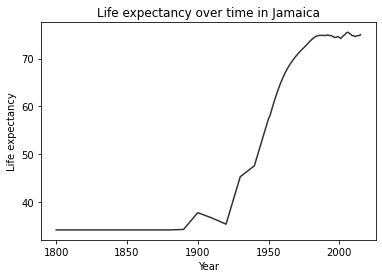

In [17]:
# subset data
df_jm = df.loc[ df['country']=='Jamaica', :]
# create plot
figure, ax = plt.subplots()
ax.plot(df_jm['year'], df_jm['life_expectancy'], color='#333') # a dark charcoal
ax.set_xlabel('Year')
ax.set_ylabel('Life expectancy')
ax.set_title('Life expectancy over time in Jamaica')
plt.show()

You can put two lines from separate data sources on the same plot, as well, just by calling `axis.plot()` again, making sure to specify a different color and label. Calling `ax.legend()` will auto-generate a legend.

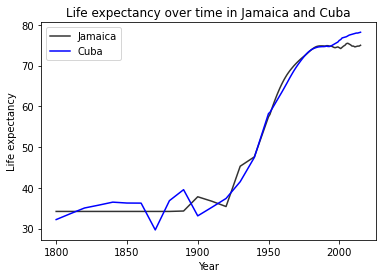

In [34]:
df_cb = df.loc[ df['country']=='Cuba', :]
figure, ax = plt.subplots()
# draw two lines, with different colors and different labels
ax.plot(df_jm['year'], df_jm['life_expectancy'], color='#333', label='Jamaica') 
ax.plot(df_cb['year'], df_cb['life_expectancy'], color='blue', label='Cuba') 
ax.set_xlabel('Year')
ax.set_ylabel('Life expectancy')
ax.set_title('Life expectancy over time in Jamaica and Cuba')
ax.legend() # add legend
plt.show()

### Multipanel Plots

You can also subdivide a figure into multiple panels with `plt.subplots(x,y)`, with x being the number of rows, and y being the numbers of columns. This creates an axes object with multiple indexes.

First, let's do a simple vertical column with 2 panels with `plt.subplots(2,1)`. To make the different plots, you specify where with `ax[i]`.

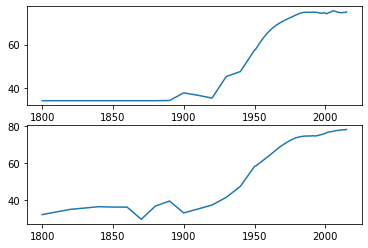

In [19]:
df_cb = df.loc[ df['country']=='Cuba', :]
# create plot with multiple panels
figure, ax = plt.subplots(2,1) # rows by columns
ax[0].plot(df_jm['year'], df_jm['life_expectancy'])
ax[1].plot(df_cb['year'], df_cb['life_expectancy'])
# figure.set_title('Life expectancy over time in Cuba')
plt.show()

To make labels and titles for the panels, you also need to specify `ax[i]` for each label. Thankfully, we can use `plt.subplots(sharex=True, sharey=True)` to minimize the number of labels. This also makes the axes of the different panels have the same ranges. Make sure your panels use the same units, however.

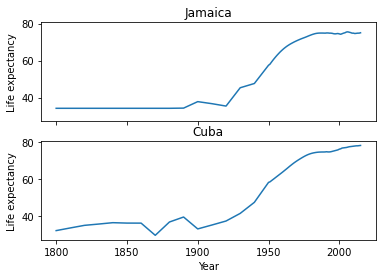

In [26]:
# create plot
figure, ax = plt.subplots(2,1, sharex=True, sharey=True) # rows by columns
ax[0].plot(df_jm['year'], df_jm['life_expectancy'])
ax[1].plot(df_cb['year'], df_cb['life_expectancy'])
ax[1].set_xlabel('Year')
ax[0].set_ylabel('Life expectancy')
ax[1].set_ylabel('Life expectancy')
ax[0].set_title('Jamaica')
ax[1].set_title('Cuba')
plt.show()

If subplots become too squished, you can also change the figure size with `plt.subplots(figsize=(x,y))`.

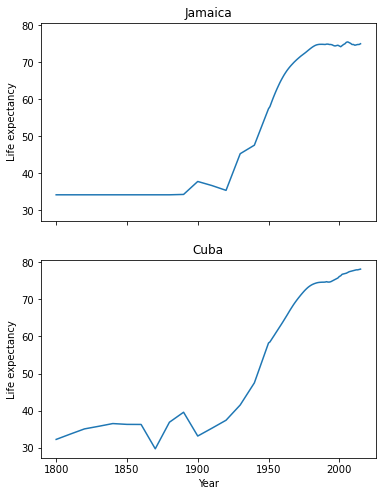

In [27]:
figure, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(6,8)) # rows by columns
ax[0].plot(df_jm['year'], df_jm['life_expectancy'])
ax[1].plot(df_cb['year'], df_cb['life_expectancy'])
ax[1].set_xlabel('Year')
ax[0].set_ylabel('Life expectancy')
ax[1].set_ylabel('Life expectancy')
ax[0].set_title('Jamaica')
ax[1].set_title('Cuba')
plt.show()

If we want to use multiple rows and columns, we now gain another index (`ax[i,j]`). 

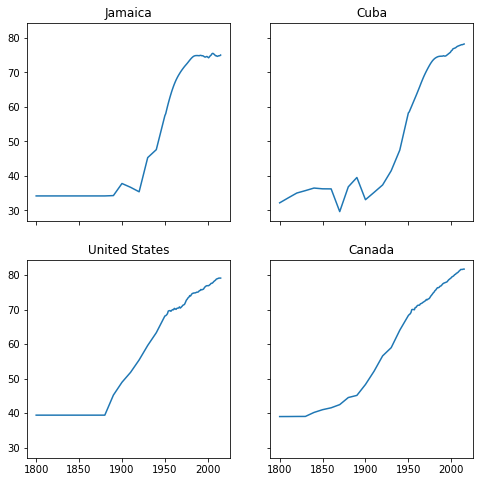

In [39]:
df_us = df.loc[ df['country']=='United States', :]
df_ca = df.loc[ df['country']=='Canada', :]

figure, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8)) # rows by columns
ax[0,0].plot(df_jm['year'], df_jm['life_expectancy'])
ax[0,0].set_title('Jamaica')
ax[0,1].plot(df_cb['year'], df_cb['life_expectancy'])
ax[0,1].set_title('Cuba')
ax[1,0].plot(df_us['year'], df_us['life_expectancy'])
ax[1,0].set_title('United States')
ax[1,1].plot(df_ca['year'], df_ca['life_expectancy'])
ax[1,1].set_title('Canada')
plt.show()

When the number of panels, the amount of code duplication can get a little out of hand. Here, we use a nested `for` loop and nested list to reduce the amount of code needed for a 3 x 3 figure. 

We generate a blank multipanel figure before the loops. We then make one row at a time, going left to right, making a new subset for each panel.

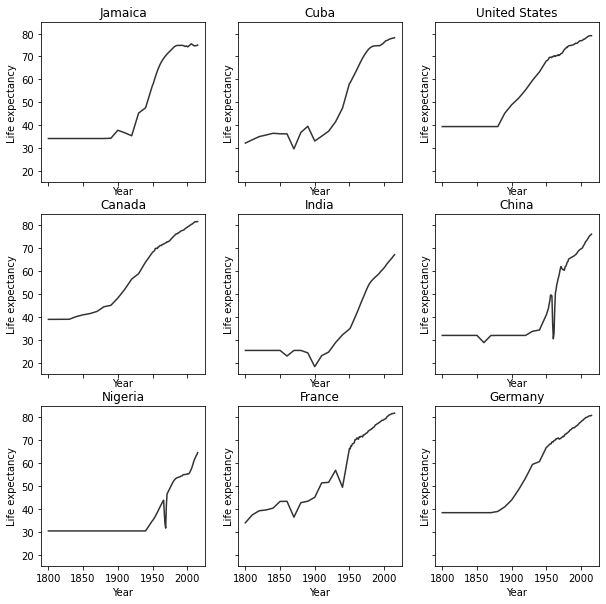

In [47]:
# how many rows and columns?
nrow = 3
ncol = 3

# draw axes
figure, ax = plt.subplots(nrow,ncol, sharex=True, sharey=True, figsize=(10,10)) 

# list of lists of countries -> 3x3
countries = [
    ['Jamaica', 'Cuba', 'United States'], 
    ['Canada', 'India', 'China'], 
    ['Nigeria','France', 'Germany']
]

for i in range(nrow): # i goes from 0 - 2
    
    for j in range(ncol): # j goes from 0 - 2
        
        country = countries[i][j]
        df_sub = df.loc[ df['country']==country, :]
        
        ax[i,j].plot(df_sub['year'], df_sub['life_expectancy'], color='#333') 
        ax[i,j].set_xlabel('Year')
        ax[i,j].set_ylabel('Life expectancy')
        ax[i,j].set_title(country) # make sure to give each a title

plt.show()

## Seaborn

Seaborn is another plotting library in Python. It has many different figure themes and color palettes built in to make great visualizations out of the box. It has its own syntax and functions, but it also has compatibility with Matplotlib, if you would like to use the same functions but with Seaborn aesthetics.

In [12]:
import seaborn as sns

/Users/fordfishman/opt/anaconda3/envs/workshop/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Seaborn allows you to set a theme that will be used for subsequently created figures. We will use the default theme with `sns.set_theme()`.

In [26]:
# Apply the default theme
sns.set_theme()

For info on setting themes and palettes, see the [Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html).

We can make a stacked histogram with `sns.histplot()`. We specify the data source as `df` with `data=df`. Once we do this, we can specify that the x-values will be from the `life_expectancy` column, and the colors of the stacks will be from `region`.

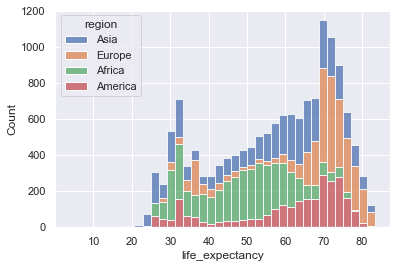

In [50]:
sns.histplot(data=df, x="life_expectancy", hue="region", multiple="stack")
plt.show()

Seaborn also fully integrates with Matplotlib. Once you use a Seaborn theme, Matplotlib will also use that theme.

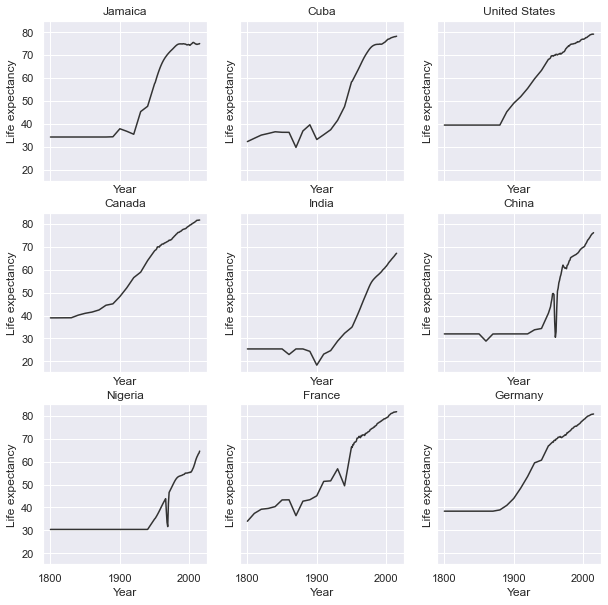

In [51]:
## same code as above for 3x3 plot

# how many rows and columns?
nrow = 3
ncol = 3

# draw axes
figure, ax = plt.subplots(nrow,ncol, sharex=True, sharey=True, figsize=(10,10)) 

# list of lists of countries -> 3x3
countries = [
    ['Jamaica', 'Cuba', 'United States'], 
    ['Canada', 'India', 'China'], 
    ['Nigeria','France', 'Germany']
]

for i in range(nrow): # i goes from 0 - 2
    
    for j in range(ncol): # j goes from 0 - 2
        
        country = countries[i][j]
        df_sub = df.loc[ df['country']==country, :]
        
        ax[i,j].plot(df_sub['year'], df_sub['life_expectancy'], color='#333') 
        ax[i,j].set_xlabel('Year')
        ax[i,j].set_ylabel('Life expectancy')
        ax[i,j].set_title(country) # make sure to give each a title

plt.show()

#### Question

Plot histograms of `population` for each region in the year 2000 in the `gapminder.csv` data set. You can do this in one or multiple panels.

*Hint*: To make the histogram look a little better, you can import `numpy.log10` to transform `population`.

In [ ]:
### your code here:


## Resources

You can make virtually any plot and customization you can think of in Python. Some searching online will go a long way in showing how to do construct your dream figure. 

- [More on Matplotlib](https://matplotlib.org/)
- [More on Seaborn](https://seaborn.pydata.org/index.html)
- [Python Graph Gallery](https://www.python-graph-gallery.com/)